In [1]:
import numpy as np 
import pandas as pd 
import nltk

In [2]:
df = pd.read_csv('RestaurantClustering.csv')

In [3]:
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
#dropping unwanted columns

df = df.drop(columns=['Links', 'Timings'])

In [5]:
df.head()

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


In [6]:
# Since we are not clustering on the basis of Cost, so we can remove it

df = df.drop(columns=['Cost'])

In [7]:
df.head()

,Name,Collections,Cuisines
0,Beyond Flavours,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


In [8]:
df.shape

(105, 3)

In [9]:
df.isnull().sum()

Name            0
Collections    54
Cuisines        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Collections  51 non-null     object
 2   Cuisines     105 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [11]:
df1 = pd.read_csv('RestaurantClustering.csv')

In [12]:
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [13]:
import matplotlib.pyplot as plt

In [14]:
df1['Cost'] = df1['Cost'].str.replace(',', '')

In [15]:
df1['Cost'] = df1['Cost'].astype(int)

In [16]:
df1.dtypes

Name           object
Links          object
Cost            int32
Collections    object
Cuisines       object
Timings        object
dtype: object

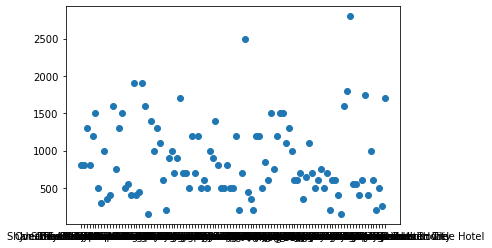

In [17]:
plt.scatter(df1['Name'], df1['Cost'])
plt.show()

In [18]:
df.groupby(['Name']).sum()

,Collections,Cuisines
Name,,
10 Downing Street,Trending This Week,"North Indian, Chinese, Continental"
13 Dhaba,Veggie Friendly,North Indian
"3B's - Buddies, Bar & Barbecue","Barbecue & Grill, Live Sports Screenings","North Indian, Mediterranean, European"
AB's - Absolute Barbecues,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian"
Absolute Sizzlers,Great Buffets,"Continental, American, Chinese"
...,...,...
Wich Please,0,Fast Food
Yum Yum Tree - The Arabian Food Court,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Hyderabadi"
Zega - Sheraton Hyderabad Hotel,0,"Asian, Sushi"


In [19]:
df.isna().sum()

Name            0
Collections    54
Cuisines        0
dtype: int64

In [20]:
df["Collections"] = df["Collections"].str.lower()
df.head()

,Name,Collections,Cuisines
0,Beyond Flavours,"food hygiene rated restaurants in hyderabad, c...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,hyderabad's hottest,"Biryani, North Indian, Chinese"
2,Flechazo,"great buffets, hyderabad's hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,late night restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,"best bars & pubs, food hygiene rated restauran...","Asian, Continental, North Indian, Chinese, Med..."


In [21]:
df["Cuisines"] = df["Cuisines"].str.lower()
df.head()

,Name,Collections,Cuisines
0,Beyond Flavours,"food hygiene rated restaurants in hyderabad, c...","chinese, continental, kebab, european, south i..."
1,Paradise,hyderabad's hottest,"biryani, north indian, chinese"
2,Flechazo,"great buffets, hyderabad's hottest","asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,late night restaurants,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"best bars & pubs, food hygiene rated restauran...","asian, continental, north indian, chinese, med..."


In [22]:
df['Cuisines'] = df['Cuisines'].str.replace(r'[^\w\s]+', '')

In [23]:
df['Collections'] = df['Collections'].str.replace(r'[^\w\s]+', '')

In [24]:
df.head()

,Name,Collections,Cuisines
0,Beyond Flavours,food hygiene rated restaurants in hyderabad co...,chinese continental kebab european south india...
1,Paradise,hyderabads hottest,biryani north indian chinese
2,Flechazo,great buffets hyderabads hottest,asian mediterranean north indian desserts
3,Shah Ghouse Hotel & Restaurant,late night restaurants,biryani north indian chinese seafood beverages
4,Over The Moon Brew Company,best bars pubs food hygiene rated restaurants...,asian continental north indian chinese mediter...


In [26]:
# Removing stopwords:

from nltk.corpus import stopwords

stop = set(stopwords.words('english')) 

df["Collections"] = df["Collections"].replace(np.nan, '', regex=True)

df['Collections'] = df['Collections'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

df['Cuisines'] = df['Cuisines'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [27]:
df.head()

,Name,Collections,Cuisines
0,Beyond Flavours,food hygiene rated restaurants hyderabad corpo...,chinese continental kebab european south india...
1,Paradise,hyderabads hottest,biryani north indian chinese
2,Flechazo,great buffets hyderabads hottest,asian mediterranean north indian desserts
3,Shah Ghouse Hotel & Restaurant,late night restaurants,biryani north indian chinese seafood beverages
4,Over The Moon Brew Company,best bars pubs food hygiene rated restaurants ...,asian continental north indian chinese mediter...


In [28]:
# Word Cloud:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

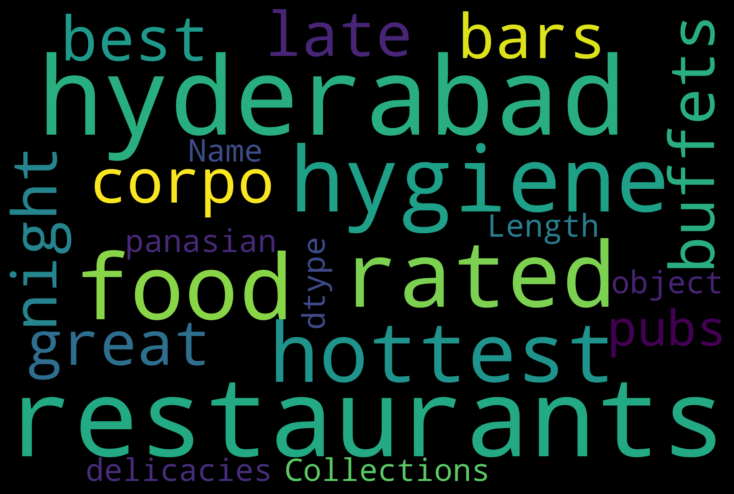

In [30]:
STOPWORDS = set(stopwords.words('english'))


wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df['Collections']))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

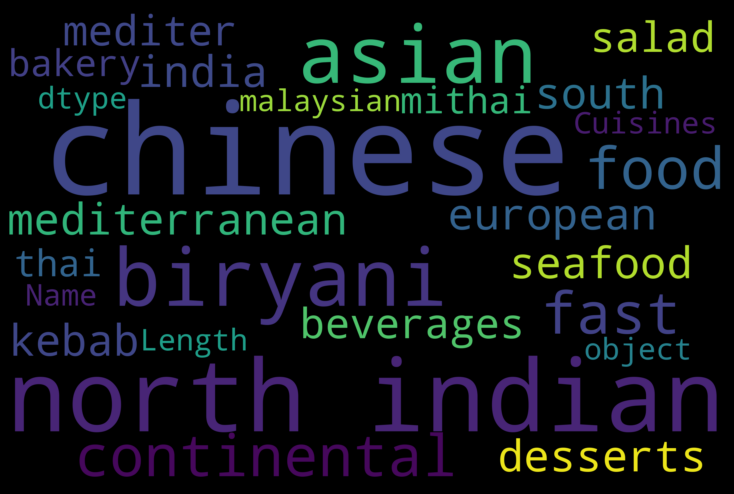

In [31]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df['Cuisines']))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vectorizer = TfidfVectorizer()

In [36]:
X = vectorizer.fit_transform(df["Cuisines"])

In [44]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=1)

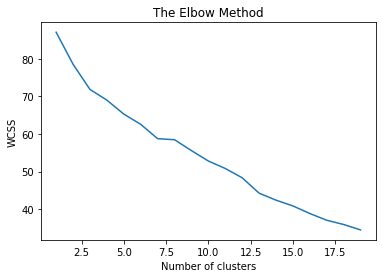

In [49]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=1,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)

Top terms per cluster:
Cluster 0:
 food
 fast
 indian
 north
 burger
 desserts
 beverages
 mediterranean
 kebab
 cafe
Cluster 1:
 continental
 italian
 asian
 indian
 north
 american
 desserts
 chinese
 cafe
 modern
Cluster 2:
 indian
 north
 chinese
 biryani
 south
 andhra
 mughlai
 hyderabadi
 continental
 seafood
Cluster 3:
 bakery
 desserts
 fast
 food
 mithai
 cafe
 juices
 mughlai
 chinese
 north
Cluster 4:
 asian
 momos
 sushi
 thai
 chinese
 japanese
 eastern
 indonesian
 malaysian
 north


In [47]:
y = vectorizer.fit_transform(df["Collections"])
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
model.fit(y)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(10):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)

Top terms per cluster:
Cluster 0:
 delicacies
 panasian
 week
 function
 food
 friendly
 frozen
 fun
 gigs
 fancy
Cluster 1:
 best
 fun
 fancy
 favorites
 late
 night
 haleem
 venues
 function
 curated
Cluster 2:
 hyderabads
 hottest
 buffets
 great
 rated
 hygiene
 food
 hyderabad
 restaurants
 corporate
Cluster 3:
 rated
 hygiene
 food
 restaurants
 hyderabad
 biryanis
 favorites
 hottest
 barbecue
 happy
Cluster 4:
 sunday
 brunches
 italian
 great
 gigs
 food
 friendly
 frozen
 fun
 function
Cluster 5:
 sports
 live
 screenings
 buffets
 great
 rooftops
 pubs
 bars
 best
 week
Cluster 6:
 week
 trending
 buffets
 great
 favorites
 food
 friendly
 frozen
 fun
 function
Cluster 7:
 new
 gold
 week
 favorites
 food
 friendly
 frozen
 fun
 function
 gigs
Cluster 8:
 friendly
 veggie
 thalis
 terrific
 street
 pocket
 food
 gold
 great
 grill
Cluster 9:
 sneak
 peek
 hyderabad
 gigs
 events
 pubs
 bars
 best
 favorites
 hottest


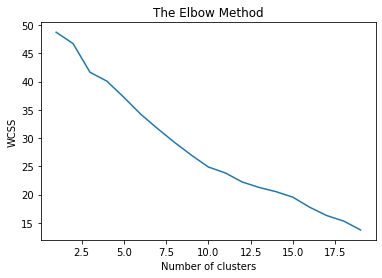

In [50]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=1,random_state=0)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()